# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
# your answer here
employee = pd.read_csv('Employee.csv')
employee.columns = [e.lower().replace(' ','_') for e in employee.columns]

In [3]:
employee.shape

(9, 7)

In [4]:
employee.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        9 non-null      object
 1   department  9 non-null      object
 2   education   9 non-null      object
 3   gender      9 non-null      object
 4   title       9 non-null      object
 5   years       9 non-null      int64 
 6   salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 3.0 KB


In [5]:
employee.head()

,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [6]:
# your answer 
mean = employee.groupby("department")["salary"].mean()
mean

department
HR       45.00
IT       48.75
Sales    55.00
Name: salary, dtype: float64

In [7]:
mean_salary_by_department = employee.pivot_table(values="salary", index="department", aggfunc="mean")
mean_salary_by_department


,salary
department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [8]:
# your answer here
employee.pivot_table(values = "salary", index = ("department", "title"), aggfunc="mean")

salary
department title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [9]:
# your answer here
employee.pivot_table(values= "salary", index= ("title","years" ), aggfunc= "mean")

salary
title     years        
VP        8          70
analyst   1          35
          2          30
          4          35
associate 2          55
          3          55
          7          60

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [10]:
# your answer here
employee.pivot_table(values=('salary', "name"), index = ('title', "department") , aggfunc={"salary": "mean", "name": "count"})

name  salary
title     department              
VP        HR             1    70.0
          IT             1    70.0
analyst   HR             2    32.5
          IT             2    32.5
associate IT             1    60.0
          Sales          2    55.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [11]:
# your answer here
analitycs = employee.pivot_table(values= "salary", index = ("department","title"),  aggfunc = ['median', 'min', 'max', 'std'] )
analitycs

median    min    max       std
                     salary salary salary    salary
department title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [12]:
analitycs["std"] = analitycs["std"].fillna(0)
analitycs

median    min    max       std
                     salary salary salary    salary
department title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

In [13]:
employee.head(1)

,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35


#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [14]:
# your answer here
# Group the data by department
department_stats = employee.groupby('department').agg({'salary': 'sum', 'name': 'count'})

# Rename the columns
department_stats.rename(columns={'salary': 'Total Salary', 'name': 'Number of Employees'}, inplace=True)

# Display the department statistics
department_stats


,Total Salary,Number of Employees
department,,
HR,135,3
IT,195,4
Sales,110,2


In [15]:
employee.head(1)
# your answer here
analitycs = employee.pivot_table(values= "salary", index = ("department","title"),  aggfunc = ['median', 'min', 'max', 'std'] )

#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [16]:
# your answer here
employee.pivot_table(values = ("years", "salary"), index= ("department" ,"title"), aggfunc = {"years":"count", "salary": "mean"})

salary  years
department title                   
HR         VP           70.0      1
           analyst      32.5      2
IT         VP           70.0      1
           analyst      32.5      2
           associate    60.0      1
Sales      associate    55.0      2

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [17]:
# your answer here
# Custom function to calculate mean salary after removing maximum value
def mean_salary_without_max(x):
    max_salary = x.max()
    return x[x < max_salary].mean()

# Create the pivot table
employee.pivot_table(values='salary', index='department', aggfunc=mean_salary_without_max)

,salary
department,
HR,32.500000
IT,41.666667


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [18]:
# your answer here
fitbit = pd.read_csv("Fitbit.csv")

In [19]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [20]:
# your answer here
fitbit.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [45]:
# your answer here
fitbit.columns = [e.lower().replace(" ", "_") for e in fitbit.columns]
fitbit.head()


,date,calorie_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,minutesofsleep,minutesofbeingawake,numberofawakings,lengthofrestinminutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [47]:
# your answer here
correlation = fitbit["minutes_very_active"].corr(fitbit["steps"])
correlation

0.5714518481062609

In [49]:
corr=fitbit.corr(method='pearson')
corr

,calorie_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,minutesofsleep,minutesofbeingawake,numberofawakings,lengthofrestinminutes
calorie_burned,1.000000,0.255305,0.292790,0.130757,0.125353,0.209540,0.188256,0.197881,-0.130758,0.011485,0.041999,0.030490,0.017460
steps,0.255305,1.000000,0.779678,0.306511,0.076906,0.393010,0.303244,0.571452,-0.160568,0.130986,0.124846,0.106591,0.133405
distance,0.292790,0.779678,1.000000,0.382940,0.160632,0.455272,0.348113,0.759310,-0.246853,0.129442,0.130447,0.091095,0.134550
floors,0.130757,0.306511,0.382940,1.000000,0.057812,-0.085992,0.278408,0.399503,-0.155532,0.069464,0.064587,0.043459,0.075864
minutes_sedentary,0.125353,0.076906,0.160632,0.057812,1.000000,0.217021,0.084137,0.105963,-0.161446,0.204242,0.200589,0.178387,0.208539
minutes_lightly_active,0.209540,0.393010,0.455272,-0.085992,0.217021,1.000000,0.014288,-0.034425,-0.219892,0.105048,0.096107,0.087150,0.105406
minutes_fairly_active,0.188256,0.303244,0.348113,0.278408,0.084137,0.014288,1.000000,0.337839,-0.204562,0.114950,0.104303,0.100498,0.123034
minutes_very_active,0.197881,0.571452,0.759310,0.399503,0.105963,-0.034425,0.337839,1.000000,-0.187309,0.108018,0.116559,0.099859,0.115641
activity_calories,-0.130758,-0.160568,-0.246853,-0.155532,-0.161446,-0.219892,-0.204562,-0.187309,1.000000,-0.005804,0.010859,0.022757,-0.004992
minutesofsleep,0.011485,0.130986,0.129442,0.069464,0.204242,0.105048,0.114950,0.108018,-0.005804,1.000000,0.779595,0.780512,0.997184


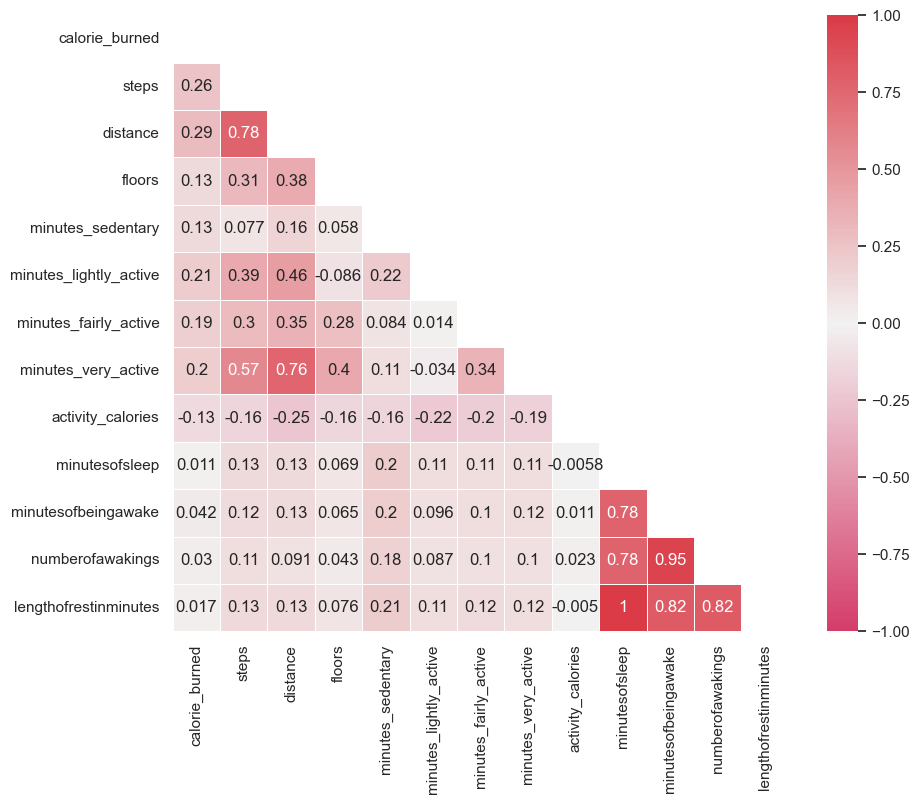

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='white')                            # estilo blanco

mascara=np.triu(np.ones_like(corr, dtype=bool))   # generar mascara

cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores

# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 8))  # Especifica el tamaño deseado en pulgadas (ancho, alto)

# Generar el mapa de calor
sns.heatmap(corr,
            mask=mascara,
            cmap=cmap,
            vmax=1,
            vmin=-1,
            center=0,
            square=True,
            linewidth=0.5,
            cbar_kws={'shrink': 1},
            annot=True)

# Mostrar el gráfico
plt.show()

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

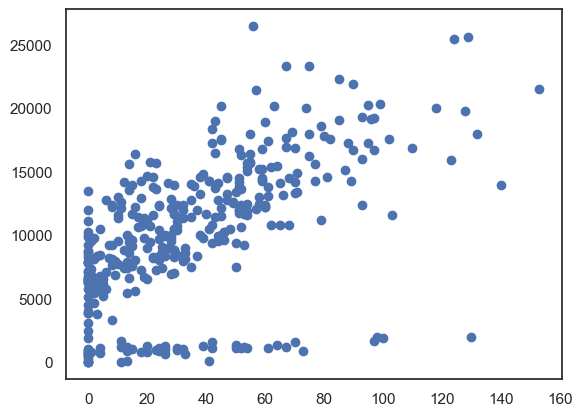

In [70]:
# your answer here
plt.scatter(x=fitbit['minutes_very_active'], y=fitbit['steps'])

#### What can you say about Minute Very Active and Steps? Write a comment below

Se puede observar que hay un correlación ascendente, parece ser que influye de manera positiva

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [72]:
# your answer here
correlation = fitbit["minutes_sedentary"].corr(fitbit["steps"])
correlation

0.07690608062990095

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

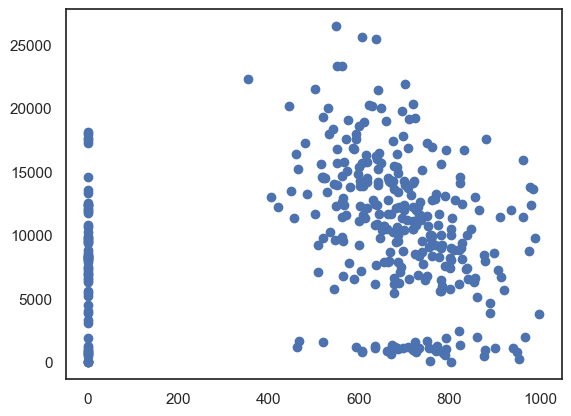

In [73]:
# your answer here
plt.scatter(x=fitbit['minutes_sedentary'], y=fitbit['steps'])

In [74]:
# Se puede observar que hay una correlación lineal negativa

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [77]:
# your answer here
correlation = fitbit["minutesofsleep"].corr(fitbit["steps"])
correlation

0.13098565950836383

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

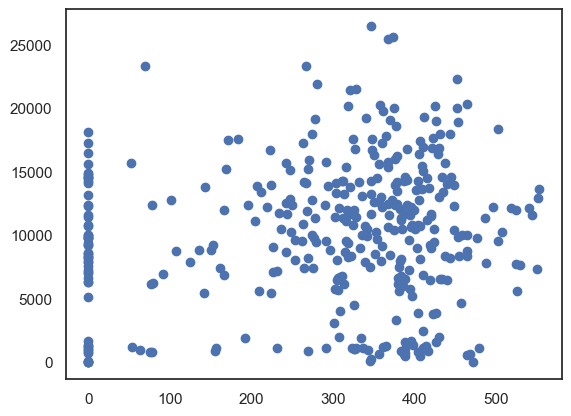

In [78]:
# your answer here
plt.scatter(x=fitbit['minutesofsleep'], y=fitbit['steps'])

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [80]:
# your answer here
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
column = [e.lower().replace(' ','_') for e in column]

In [81]:
column

['calorie_burned',
 'steps',
 'floors',
 'minutes_sedentary',
 'minutes_very_active',
 'minutesofsleep']

In [84]:
# your answer here
subset = fitbit[column]

# Calcular la matriz de correlación
cor_fit = subset.corr()

# Imprimir la matriz de correlación
cor_fit


,calorie_burned,steps,floors,minutes_sedentary,minutes_very_active,minutesofsleep
calorie_burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
minutes_sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
minutes_very_active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
minutesofsleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


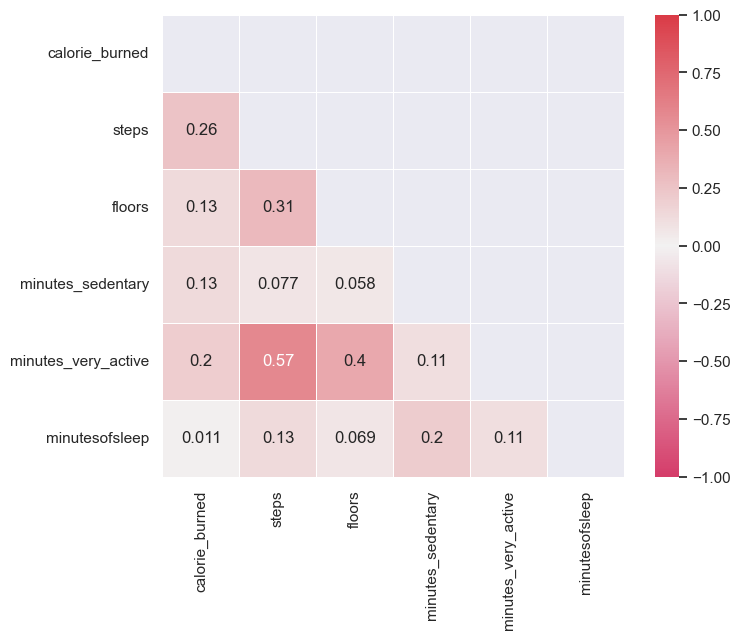

In [91]:

sns.set(style='dark')                            # estilo blanco

mascara=np.triu(np.ones_like(cor_fit, dtype=bool))   # generar mascara

cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores

# Ajustar el tamaño de la figura
plt.figure(figsize=(8, 6))  # Especifica el tamaño deseado en pulgadas (ancho, alto)

# Generar el mapa de calor
sns.heatmap(cor_fit,
            mask=mascara,
            cmap=cmap,
            vmax=1,
            vmin=-1,
            center=0,
            square=True,
            linewidth=0.5,
            cbar_kws={'shrink': 1},
            annot=True)

# Mostrar el gráfico
plt.show()

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [93]:

# Seleccionar la fila correspondiente a 'Steps' y ordenar los resultados en orden descendente
cor_steps = cor_fit.loc["steps"].sort_values(ascending=False)
cor_steps

steps                  1.000000
minutes_very_active    0.571452
floors                 0.306511
calorie_burned         0.255305
minutesofsleep         0.130986
minutes_sedentary      0.076906
Name: steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [95]:
# your answer here
time_grades = pd.read_csv('Time_Grades.csv')
time_grades.columns= [e.lower().replace(' ','_') for e in time_grades.columns]
time_grades.head()


,name,study_time,grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


In [96]:
time_grades.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        15 non-null     object
 1   study_time  15 non-null     int64 
 2   grade       15 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3 KB


#### Show visually the frequency distribution of the time_grades dataset.

In [103]:
import cufflinks as cf
cf.go_offline()

data = time_grades['grade']

data.iplot(kind='hist', xTitle='grade', yTitle='frequency', 
           title='Frequency Distribution of Time Grades')


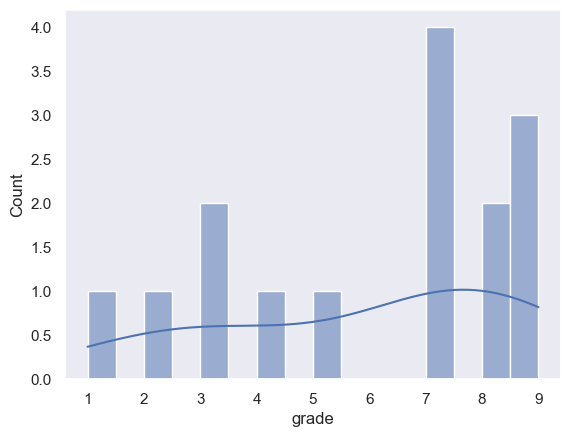

In [118]:
sns.histplot(x=time_grades.grade,
             bins=8,
             binwidth=0.5,  # ancho de la barra
             kde=True           # kde = kernel density estimation, la linea de ajuste
            );

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [121]:
# your answer 

corr_pearson = time_grades.corr(method='pearson')
corr_pearson

,study_time,grade
study_time,1.000000,0.798046
grade,0.798046,1.000000


In [122]:
corr_spearman = time_grades.corr(method='spearman')
corr_spearman

,study_time,grade
study_time,1.000000,0.819659
grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

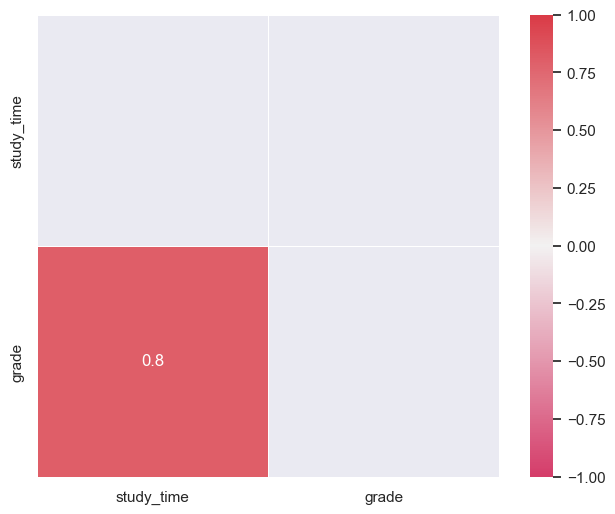

In [123]:
# your answer here
sns.set(style='dark')                            # estilo blanco

mascara=np.triu(np.ones_like(corr_pearson, dtype=bool))   # generar mascara

cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores

# Ajustar el tamaño de la figura
plt.figure(figsize=(8, 6))  # Especifica el tamaño deseado en pulgadas (ancho, alto)

# Generar el mapa de calor
sns.heatmap(corr_pearson,
            mask=mascara,
            cmap=cmap,
            vmax=1,
            vmin=-1,
            center=0,
            square=True,
            linewidth=0.5,
            cbar_kws={'shrink': 1},
            annot=True)

# Mostrar el gráfico
plt.show()

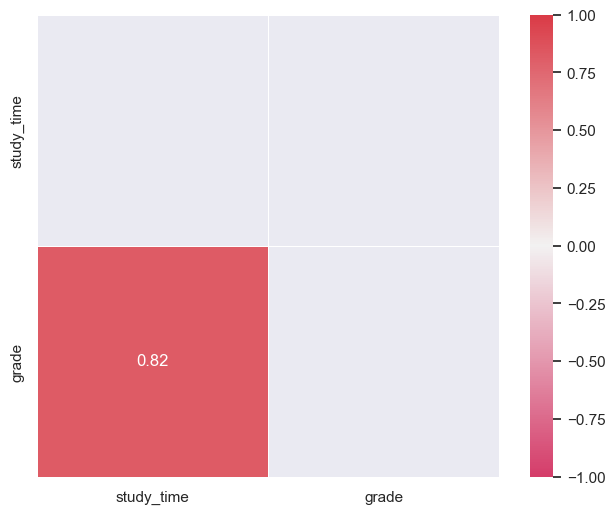

In [124]:
#your comment here
# your answer here
sns.set(style='dark')                            # estilo blanco

mascara=np.triu(np.ones_like(corr_spearman, dtype=bool))   # generar mascara

cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores

# Ajustar el tamaño de la figura
plt.figure(figsize=(8, 6))  # Especifica el tamaño deseado en pulgadas (ancho, alto)

# Generar el mapa de calor
sns.heatmap(corr_spearman,
            mask=mascara,
            cmap=cmap,
            vmax=1,
            vmin=-1,
            center=0,
            square=True,
            linewidth=0.5,
            cbar_kws={'shrink': 1},
            annot=True)

# Mostrar el gráfico
plt.show()

**Podemos observar que hay una relación entre el grado y el tiempo de estudio**

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

Pearson muestra relaciones lineales entre variables normalmente distribuidas y Spearman demuestra relaciones lineales entre variables distribuidas y no distribuidas